In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification-dataset/Credit Score Classification Dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-score-classification-dataset/Credit Score Classification Dataset.csv")

In [3]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [4]:
df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [5]:
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].factorize()[0]

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Marital Status'}>,
        <Axes: title={'center': 'Number of Children'}>],
       [<Axes: title={'center': 'Home Ownership'}>,
        <Axes: title={'center': 'Credit Score'}>, <Axes: >]], dtype=object)

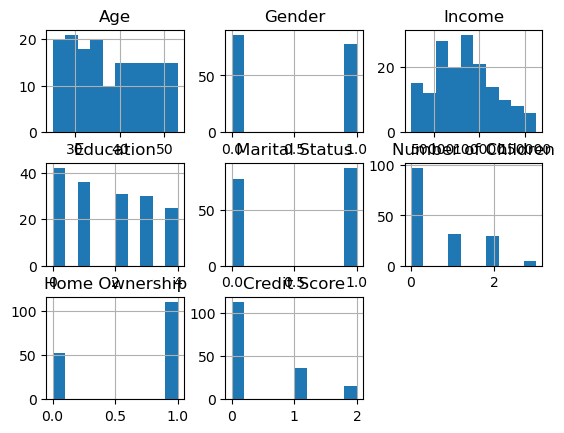

In [6]:
df.hist()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'Credit Score'], df['Credit Score'], test_size=0.3)

In [8]:
# Base Acc: 0.8859649122807017, 0.82
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')

model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.9210526315789473, 0.74)

In [9]:
# Base Acc: 1.0, 0.98

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.98)

In [10]:
for i in range(len(clf.feature_names_in_)):
    print(clf.feature_names_in_[i], clf.feature_importances_[i])

Age 0.05274254561637735
Gender 0.0
Income 0.3359034267912772
Education 0.0
Marital Status 0.0
Number of Children 0.0
Home Ownership 0.6113540275923455


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 1.0)